# Trying to do Regression for Energy

In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd

In [2]:
fname1 = "electron_30deg_50wob_NOISE120.mscw.fits"
with fits.open(fname1) as hdul:
   df1 = Table.read(hdul[1]).to_pandas()

fname2 = "protons_30deg_5.0wob_NOISE120.mscw.fits"
with fits.open(fname2) as hdul:
   df2 = Table.read(hdul[1]).to_pandas()

fname3 = "helium_30deg_5.0wob_NOISE120.mscw.fits"
with fits.open(fname3) as hdul:
   df3 = Table.read(hdul[1]).to_pandas()

In [3]:
df1.head()

,runNumber,EVENT_ID,MJD,Time,TargetElev,TargetAz,TargetDec,TargetRA,WobbleN,WobbleE,...,loss_2,tgrad_x_2,size2_2,loss_3,tgrad_x_3,size2_3,ENERGY_MC,El,RA,DEC
0,301200,687,0,7205.416073,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009766,1.389887,1549.211914,0.000000,0.292370,4161.781250,0.947242,60.069143,0.0,0.0
1,301200,733,0,7205.784078,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-0.075913,1359.550049,0.000000,-0.387902,1142.989014,0.412226,60.046007,0.0,0.0
2,301200,971,0,7207.688103,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.313970,506.331024,0.000000,3.665224,726.827454,0.225460,60.573046,0.0,0.0
3,301200,1451,0,7211.528155,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159045,-1.847678,1097.658569,0.000000,-2.297319,852.899780,0.332203,59.655342,0.0,0.0
4,301200,1739,0,7213.832186,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.183963,5993.082520,0.030323,1.688663,2358.001953,1.144007,59.975325,0.0,0.0


In [4]:
#df1.tail()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466422 entries, 0 to 466421
Data columns (total 59 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   runNumber           466422 non-null  int32  
 1   EVENT_ID            466422 non-null  int32  
 2   MJD                 466422 non-null  int32  
 3   Time                466422 non-null  float64
 4   TargetElev          466422 non-null  float64
 5   TargetAz            466422 non-null  float64
 6   TargetDec           466422 non-null  float64
 7   TargetRA            466422 non-null  float64
 8   WobbleN             466422 non-null  float64
 9   WobbleE             466422 non-null  float64
 10  LTrig               466422 non-null  uint64 
 11  NTrig               466422 non-null  uint32 
 12  NImages             466422 non-null  int32  
 13  ImgSel              466422 non-null  uint64 
 14  NTtype              466422 non-null  int32  
 15  img2_ang            466422 non-nul

In [6]:
# for col in df1.columns:
#     print(col, len(df1[col].unique()), df1[col].unique())

In [7]:
# df1.describe()

## Data Visualization

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

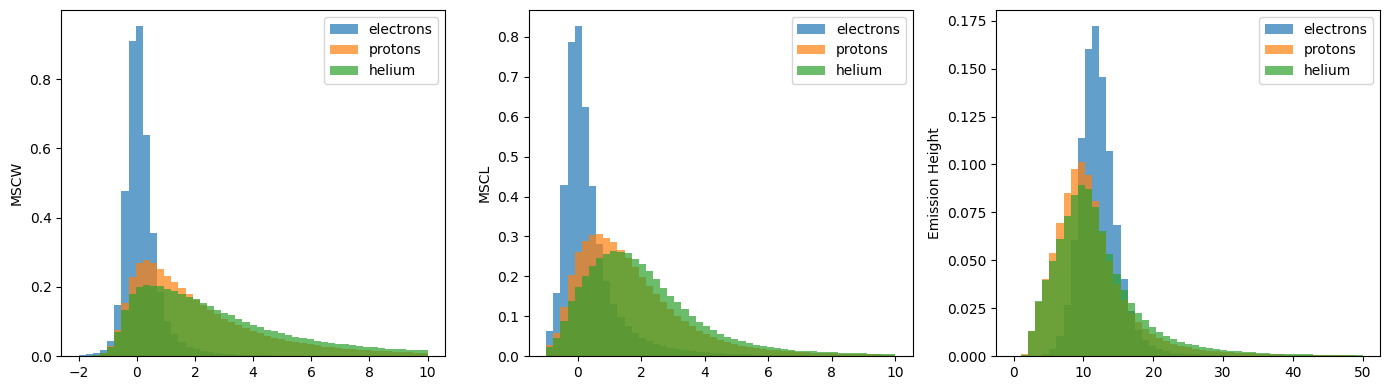

In [9]:
#fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10,7))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4), tight_layout=True)  
ax1.hist(df1['MSCW'], alpha = 0.7, bins = np.linspace(-2,10), label = 'electrons', density =True)
ax1.hist(df2['MSCW'], alpha = 0.7, bins = np.linspace(-2,10), label = 'protons', density =True)
ax1.hist(df3['MSCW'], alpha = 0.7, bins = np.linspace(-2,10), label = 'helium', density =True)
ax1.set_ylabel('MSCW')
ax1.legend()

ax2.hist(df1['MSCL'], alpha = 0.7, bins = np.linspace(-1,10), label = 'electrons', density =True)
ax2.hist(df2['MSCL'], alpha = 0.7, bins = np.linspace(-1,10), label = 'protons', density =True)
ax2.hist(df3['MSCL'], alpha = 0.7, bins = np.linspace(-1,10), label = 'helium', density =True)
ax2.set_ylabel('MSCL')
ax2.legend()

ax3.hist(df1['EmissionHeight'], alpha = 0.7, bins = np.linspace(0,50), label = 'electrons', density =True)
ax3.hist(df2['EmissionHeight'], alpha = 0.7, bins = np.linspace(0,50), label = 'protons', density =True)
ax3.hist(df3['EmissionHeight'], alpha = 0.7, bins = np.linspace(0,50), label = 'helium', density =True)
ax3.set_ylabel('Emission Height')
ax3.legend()

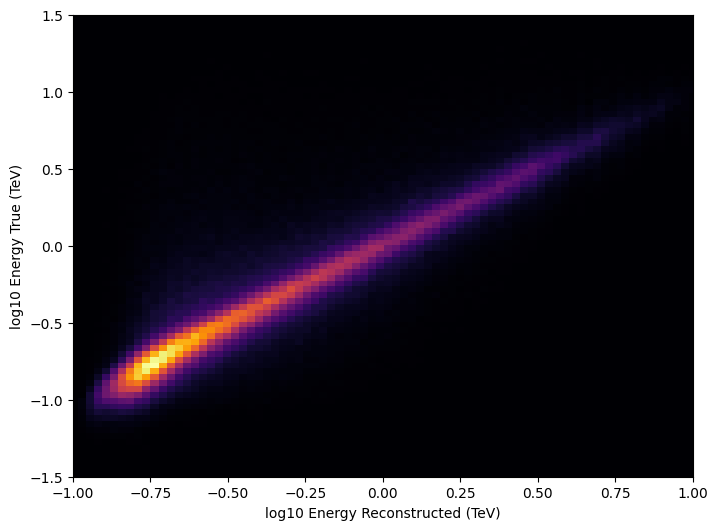

In [10]:
fig, ax = plt.subplots(figsize = (8,6))  

h = ax.hist2d(np.log10(df1['ENERGY']),np.log10(df1['ENERGY_MC']), bins=100, cmap = 'inferno')
#fig.colorbar(h[3], ax=ax)
ax.set_ylabel('log10 Energy True (TeV)')
ax.set_xlabel('log10 Energy Reconstructed (TeV)')
ax.set_xlim(-1.0,1.0)
ax.set_ylim(-1.5,1.5)
plt.show()

In [11]:
rec = df1['ENERGY']
true = df1['ENERGY_MC']

In [12]:
def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-((x - mean)**2) / (2 * sigma**2))

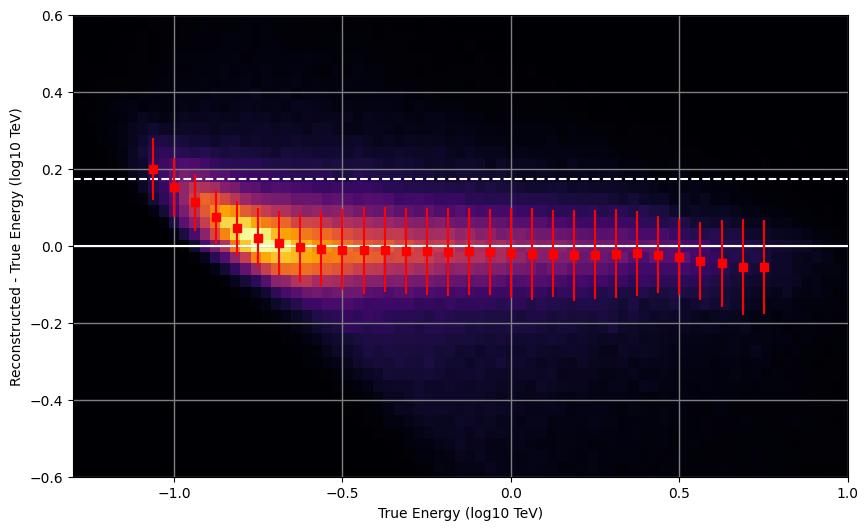

Scatter is about 0.17 (white dashed line)


In [15]:
from scipy.optimize import curve_fit
y = np.log10(rec)-np.log10(true)
x = np.log10(true)
H, xedges, yedges = np.histogram2d(x,y, bins=[np.linspace(-1.5,1.5,50), np.linspace(-1.5,1.5,50)], density =True)
H = H.T

fig, ax = plt.subplots(figsize = (10,6))  

# Perform vertical slice fits
# fits = []
# errors = []
spread = []

for i in range(H.shape[1]):
    data = H[:, i]  # Vertical slice of the 2D histogram
    xdata = np.linspace(-1.5, 1.5, len(data))

    # Perform the fit
    p0 = [np.max(data), np.mean(data), 1]  # Initial parameter guesses
    popt, pcov = curve_fit(gaussian, xdata, data, p0=p0)

#     fits.append(popt)  # Fit parameters
#     errors.append(np.sqrt(np.diag(pcov)))  # Standard deviations of fit parameters
    spread.append(abs(popt[2]))
    
    if np.logical_and(xdata[i]<0.8,xdata[i]>-1.1):
        ax.errorbar(xdata[i], popt[1], yerr = abs(popt[2]), color ='r',ls='',marker='s', zorder =10)

# for i, fit in enumerate(fits):
#     fit_data = gaussian(xdata, *fit)
#     ax.plot(xdata, fit_data, 'r-', alpha=0.5)
#     ax.fill_between(xdata, fit_data - 2 * errors[i][0], fit_data + 2 * errors[i][0], alpha=0.2)

h=ax.hist2d(x,y, bins=[np.linspace(-1.5,1.5,100), np.linspace(-1.5,1.5,100)], cmap ='inferno',density =True)

ax.grid(color='gray', linestyle='-', linewidth=1)
ax.axhline(y=0, linestyle='-',color = 'white')
ax.axhline(y=np.mean(spread), ls='--', color='w')
ax.set_ylabel('Reconstructed - True Energy (log10 TeV)')
ax.set_xlabel('True Energy (log10 TeV)')
# ax.set_xlim(-1.5,1.5)
# ax.set_ylim(-0.5,0.5)

ax.set_xlim(-1.3,1.0)
ax.set_ylim(-0.6,0.6)
plt.show()

print(f'Scatter is about {round(np.mean(spread),2)} (white dashed line)')

## Data Preparation

In [16]:
e = df1.copy()
p = df2.copy()
he = df3.copy()

showers = [e, p, he]  # electron, proton, helium simulations
for df in showers:
    print(len(df))

466422
1721492
661055


In [17]:
for df in showers:
    df.drop(['runNumber', 'EVENT_ID', 'MJD', 'Time', 'TargetElev', 'TargetAz', 'TargetDec',
            'TargetRA', 'WobbleN', 'WobbleE', 'LTrig', 'NTrig', 'NImages', 'ImgSel', 'NTtype',
            'img2_ang', 'ra', 'dec', 'theta2', 'ENERGY', 'dES', 'NTelPairs', 'TIME', 'timeOfDay',
            'El', 'RA', 'DEC', 'EChi2S', 'Ze', 'MWR', 'MLR', 'Xoff_derot', 'Yoff_derot'], axis=1, inplace=True)

In [18]:
e.dtypes  # params that may be important

Az                    float64
Xoff                  float64
Yoff                  float64
XCore                 float64
YCore                 float64
MeanPedvar            float32
NMSCW                   int32
MSCW                  float64
MSCL                  float64
EmissionHeight        float32
EmissionHeightChi2    float32
SizeSecondMax         float64
Core                  float64
loss_0                float64
tgrad_x_0             float64
size2_0               float64
loss_1                float64
tgrad_x_1             float64
size2_1               float64
loss_2                float64
tgrad_x_2             float64
size2_2               float64
loss_3                float64
tgrad_x_3             float64
size2_3               float64
ENERGY_MC             float64
dtype: object

In [19]:
def normalize(data):
    mean = np.mean(data)
    std = np.std(data)
    normalized_data = (data - mean) / std
    return normalized_data

In [20]:
e['SizeSecondMax'] = normalize(e['SizeSecondMax'])

In [21]:
e['Core'] = normalize(e['Core'])
e['size2_0'] = normalize(e['size2_0'])
e['size2_1'] = normalize(e['size2_1'])
e['size2_2'] = normalize(e['size2_2'])
e['size2_3'] = normalize(e['size2_3'])

In [22]:
e

,Az,Xoff,Yoff,XCore,YCore,MeanPedvar,NMSCW,MSCW,MSCL,EmissionHeight,...,loss_1,tgrad_x_1,size2_1,loss_2,tgrad_x_2,size2_2,loss_3,tgrad_x_3,size2_3,ENERGY_MC
0,7.355126,-0.517946,0.310960,-160.028687,-98.294327,6.341626,4,0.712218,-0.303267,11.810599,...,0.000000,0.928970,0.220725,0.009766,1.389887,0.029926,0.000000,0.292370,0.720612,0.947242
1,225.021881,-0.681965,0.945682,-73.578705,-11.539145,6.350340,3,-0.223282,-0.100045,13.080954,...,0.095673,0.769036,0.102882,0.000000,-0.075913,-0.024383,0.000000,-0.387902,-0.089059,0.412226
2,3.331833,-0.522114,-0.515060,89.756386,41.523113,6.325131,4,0.522603,0.823723,12.043703,...,0.000000,-1.093377,-0.243879,0.000000,-1.313970,-0.268699,0.000000,3.665224,-0.200678,0.225460
3,86.292686,0.590323,0.536518,-154.605072,41.275723,6.436930,2,0.324995,-0.435141,12.536512,...,0.000000,0.000000,-0.414130,0.159045,-1.847678,-0.099375,0.000000,-2.297319,-0.166864,0.332203
4,258.037445,0.830394,-0.456320,191.095215,139.306458,6.344217,4,-0.242782,0.298878,9.852885,...,0.000000,1.226071,0.268828,0.000000,0.183963,1.302409,0.030323,1.688663,0.236820,1.144007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466417,209.594193,-0.332030,-1.096550,208.813507,-17.144312,6.320111,4,-0.357933,0.866843,11.940700,...,0.000000,-1.512313,0.127704,0.058790,1.849777,-0.131706,0.035742,2.806641,-0.213304,0.717952
466418,93.557846,-0.406974,0.723162,8.411375,-171.387253,6.429130,2,0.360927,-0.032441,14.113712,...,0.061438,-1.074100,-0.276876,0.000000,0.000000,-0.413685,0.067072,-0.486313,-0.258409,0.118792
466419,123.539452,0.603527,1.521385,105.228256,-215.006958,6.352152,4,0.077672,0.939100,13.278955,...,0.073211,-3.612555,-0.045835,0.000000,2.730561,-0.354163,0.000000,-3.044051,-0.276584,0.989304
466420,295.245483,0.296409,0.558496,-139.843994,-26.701893,6.326623,4,-0.130234,0.133052,10.557482,...,0.000000,0.914889,-0.039520,0.038301,0.765656,-0.113114,0.000000,-0.046089,0.321828,0.548714


## Feature Selection

In [23]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

In [24]:
rfreg = RandomForestRegressor(n_estimators=10)

In [25]:
e_20 = e.iloc[:100000,:]

In [26]:
X = e_20.drop('ENERGY_MC', axis=1)
y = e_20['ENERGY_MC']

In [27]:
rfecv = RFECV(estimator=rfreg, step=1, scoring="neg_mean_squared_error", cv=4, verbose=0, n_jobs=-1)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Features: {rfecv.support_}")

Optimal number of features: 12
Features: [False False False False False  True  True False False False False  True
  True False  True  True False  True  True False  True  True False  True
  True]


In [28]:
print(X.columns[rfecv.support_])

Index(['MeanPedvar', 'NMSCW', 'SizeSecondMax', 'Core', 'tgrad_x_0', 'size2_0',
       'tgrad_x_1', 'size2_1', 'tgrad_x_2', 'size2_2', 'tgrad_x_3', 'size2_3'],
      dtype='object')


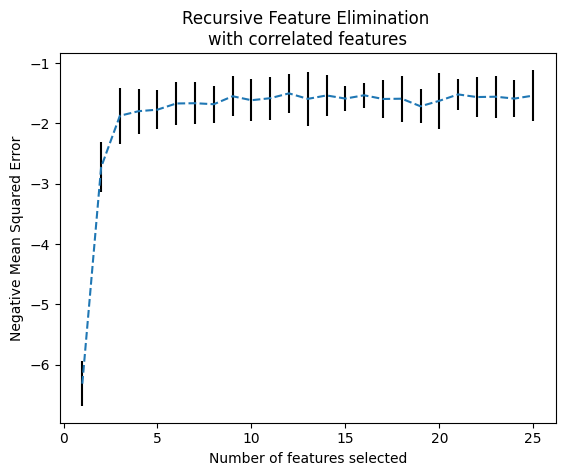

In [29]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Negative Mean Squared Error")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
    ecolor = 'k',
    linestyle = '--',
)

plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [30]:
X_red = rfecv.transform(X)

## Modelling with Gradient Boosted Decision Trees

Looking at the scikit learn example: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_red,y, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70000, 12) (30000, 12) (70000,) (30000,)


In [33]:
#from sklearn.pipeline import make_pipeline
#from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# param_distributions = {
#     "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
#     "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
#     "learning_rate": loguniform(0.01,1),
# }
# search_cv = RandomizedSearchCV(
#     GradientBoostingRegressor(),
#     param_distributions=param_distributions,
#     scoring="neg_mean_absolute_error",
#     n_iter=20,
#     random_state=1234,
#     n_jobs=-1,
# )
# search_cv.fit(X_train, y_train)

# columns = [f"param_{name}" for name in param_distributions.keys()]
# columns += ["mean_test_error", "std_test_error"]
# cv_results = pd.DataFrame(search_cv.cv_results_)
# cv_results["mean_test_error"] = -cv_results["mean_test_score"]
# cv_results["std_test_error"] = cv_results["std_test_score"]
# cv_results[columns].sort_values(by="mean_test_error")

In [35]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

## Evaluating Models

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.inspection import permutation_importance

In [37]:
yhat = reg.predict(X_test)
mse = mean_squared_error(y_test, yhat)
R2 = r2_score(y_test, yhat)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(f"R2 score: {R2}")

The mean squared error (MSE) on test set: 1.0804
R2 score: 0.7858369276048505


### Feature Importance

Text(0.5, 1.0, 'Feature Importance (MDI)')

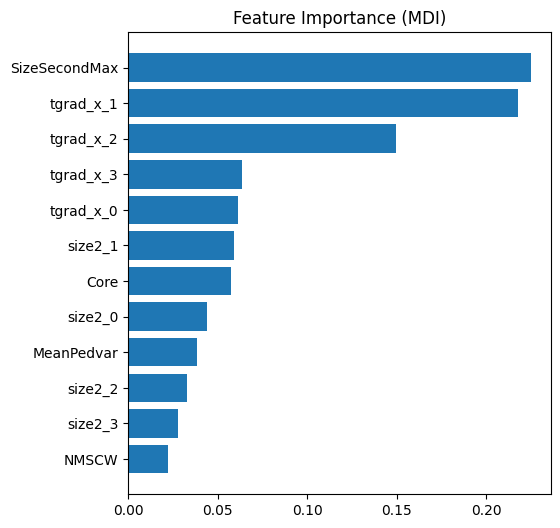

In [39]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
x = X.columns[rfecv.support_]

pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, x[sorted_idx])
plt.title("Feature Importance (MDI)")

### Permutation Importance

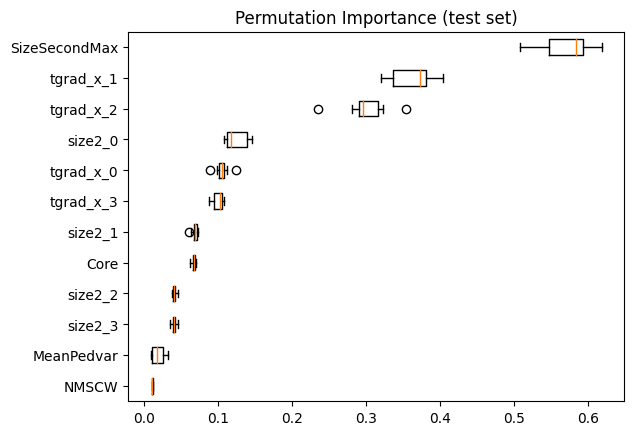

In [40]:
result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=x[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### Deviance

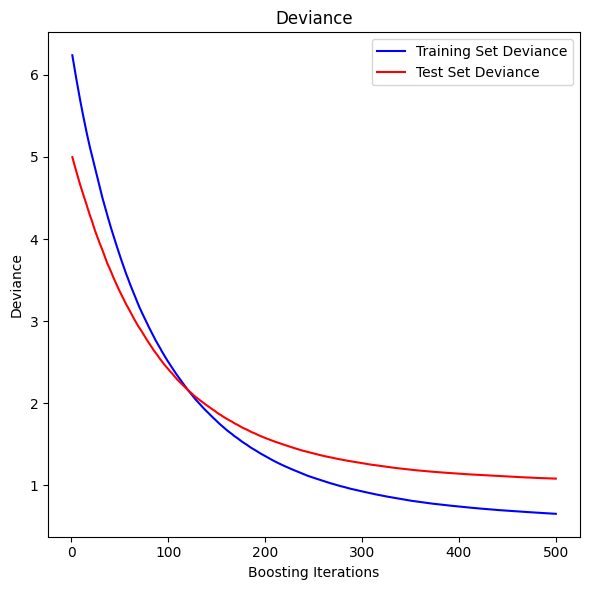

In [41]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## Energy Plot

In [42]:
reg.predict(X_test)

array([5.79220364, 0.6409553 , 0.87311251, ..., 1.77798403, 0.18748589,
       0.19113635])

In [43]:
true_energy = reg.predict(X_red)
rec_energy = df1['ENERGY'][:100000]
print(true_energy, rec_energy)

[1.01282573 0.4959897  0.24971409 ... 0.81570874 0.43262297 3.605745  ] 0        1.021947
1        0.413768
2        0.213184
3        0.303636
4        1.297236
           ...   
99995    0.228425
99996    0.507263
99997    0.646408
99998    0.522604
99999    3.154287
Name: ENERGY, Length: 100000, dtype: float64


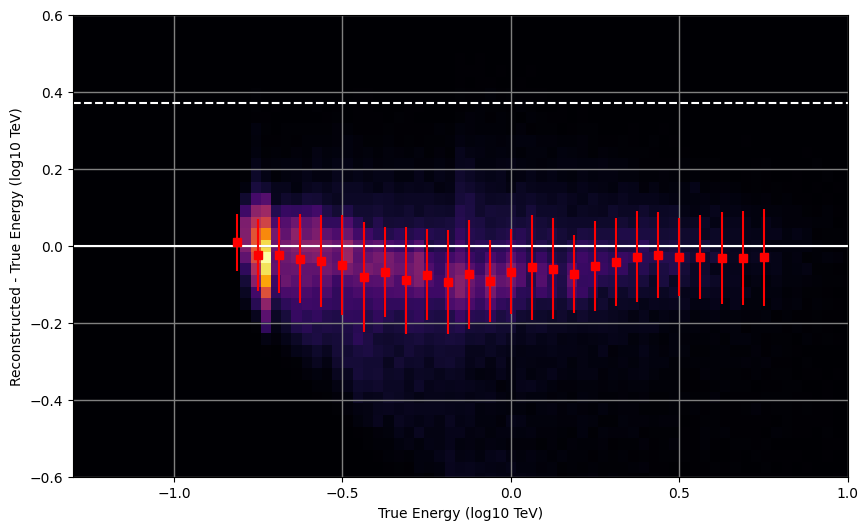

Scatter is about 0.37167475721079585


In [45]:
y = np.log10(rec_energy)-np.log10(true_energy)
x = np.log10(true_energy)

H, xedges, yedges = np.histogram2d(x,y, bins=[np.linspace(-1.5,1.5,50), np.linspace(-1.5,1.5,50)], density =True)
H = H.T

fig, ax = plt.subplots(figsize = (10,6))  

# Perform vertical slice fits
# fits = []
# errors = []
spread = []

for i in range(H.shape[1]):
    data = H[:, i]  # Vertical slice of the 2D histogram
    xdata = np.linspace(-1.5, 1.5, len(data))

    # Perform the fit
    p0 = [np.max(data), np.mean(data), 1]  # Initial parameter guesses
    popt, pcov = curve_fit(gaussian, xdata, data, p0=p0)

#     fits.append(popt)  # Fit parameters
#     errors.append(np.sqrt(np.diag(pcov)))  # Standard deviations of fit parameters
    spread.append(popt[2])
    
    if np.logical_and(xdata[i]<0.8,xdata[i]>-0.85):
        ax.errorbar(xdata[i], popt[1], yerr = abs(popt[2]), color ='r',ls='',marker='s', zorder =10)

h = ax.hist2d(x,y, bins=[np.linspace(-1.5,1.5,100), np.linspace(-1.5,1.5,100)], cmap = 'inferno', density=True)

ax.grid(color='gray', linestyle='-', linewidth=1)
ax.axhline(y=0, linestyle='-',color = 'white')
ax.axhline(y=np.mean(spread), linestyle='--',color = 'white')
ax.set_ylabel('Reconstructed - True Energy (log10 TeV)')
ax.set_xlabel('True Energy (log10 TeV)')

ax.set_xlim(-1.3,1.0)
ax.set_ylim(-0.6,0.6)
plt.show()

print(f'Scatter is about {np.mean(spread)}')

In [ ]:
# pipelines = {
#     'rf':make_pipeline(RandomForestRegressor(n_estimators=10, random_state=1234)),
#     'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
#     'ridge':make_pipeline(Ridge(random_state=1234)),
#     'lasso':make_pipeline(Lasso(random_state=1234)),
#     'enet':make_pipeline(ElasticNet(random_state=1234)),
# }

In [ ]:
# RandomForestRegressor(n_estimators=10, random_state=1234).get_params()

In [ ]:
# hypergrid = {
#     'rf': {
#         'randomforestregressor__min_samples_split':[2,4,6],
#         'randomforestregressor__min_samples_leaf':[1,2,3]
#     },
#     'gb':{
#         'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
#     },
#     'ridge':{
#         'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
#     },
#     'lasso':{
#         'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
#     },
#     'enet':{
#         'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
#     }
# }

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.exceptions import NotFittedError

In [ ]:
# fit_models = {}  # kernel keeps dying 
# for algo, pipeline in pipelines.items():
#     model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
#     try:
#         print('Starting training for {}.'.format(algo))
#         model.fit(X_train, y_train)
#         fit_models[algo] = model
#         print('{} has been successfully fit.'.format(algo))
#     except NotFittedError as e:
#         print(repr(e))

In [ ]:
#fit_models['ridge'].predict(X_test)

In [ ]:
# for algo,model in fit_models.items():
#     yhat = model.predict(X_test)
#     print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

In [ ]:
# best_model = fit_models['gb']  # highest R2

In [ ]:
# best_model.predict(X_test)

In [ ]:
# ecopy = e.copy()
# y = ecopy['ENERGY_MC']
# ecopy = ecopy.drop('ENERGY_MC', axis=1)
# ecopy = ecopy[ecopy.columns[rfecv.support_]]
# print(ecopy.shape,y.shape)

# X_train, X_test, y_train, y_test = train_test_split(ecopy, y, test_size=0.3, random_state=1234)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# params = {
#     "n_estimators": 500,
#     "max_depth": 4,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
#     "loss": "squared_error",
# }

In [ ]:
# H, xedges, yedges = np.histogram2d(np.log10(x),np.log(y)-np.log(x), bins = (np.linspace(-1.5,1.5), np.linspace(-1.5,1.5)))
# H = H.T
# plt.imshow(H, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap = 'inferno')


# def select_random_percent(data, percent):
#     sample_size = int(len(data) * percent)
#     random_sample = np.random.choice(data, size=sample_size, replace=False)
#     return random_sample

# rec = select_random_percent(rec_energy,.30)